In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
policias = pd.read_csv('data/PoliceKillingsUS.csv', encoding='ISO-8859-1')

policias

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [4]:
# Eliminar filas con valores nulos
policias_cleaned = policias.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'threat_level', 'flee']

for column in categorical_columns:
    policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])

/tmp/ipykernel_4030/2570615749.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])
/tmp/ipykernel_4030/2570615749.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])
/tmp/ipykernel_4030/2570615749.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [6]:
policias_cleaned

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,0,25,53.0,1,0,1047,47,True,0,2,False
1,4,Lewis Lee Lembke,02/01/15,0,25,47.0,1,5,20,37,False,0,2,False
2,5,John Paul Quintero,03/01/15,1,63,23.0,1,2,1247,16,False,1,2,False
3,8,Matthew Hoffman,04/01/15,0,62,32.0,1,5,1008,4,True,0,2,False
4,9,Michael Rodriguez,04/01/15,0,44,39.0,1,2,361,5,False,0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,0,64,16.0,1,1,693,2,False,2,2,False
2523,2808,Kesharn K. Burney,26/07/17,0,66,25.0,1,1,276,35,False,0,0,False
2525,2820,Deltra Henderson,27/07/17,0,25,39.0,1,1,509,18,False,0,0,False
2533,2817,Isaiah Tucker,31/07/17,0,66,28.0,1,1,847,48,False,0,0,True


In [7]:
policias_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   int64  
 4   armed                    2254 non-null   int64  
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   int64  
 7   race                     2254 non-null   int64  
 8   city                     2254 non-null   int64  
 9   state                    2254 non-null   int64  
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   int64  
 12  flee                     2254 non-null   int64  
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), int64

In [8]:
# Seleccionar solo las columnas numéricas
columnas_numericas = policias_cleaned.select_dtypes(include=['float64', 'int64'])

# Crear el escalador y ajustar a las columnas numéricas
escalador = MinMaxScaler().fit(columnas_numericas)

# Transformar las columnas numéricas
columnas_numericas_escaladas = escalador.transform(columnas_numericas)

# Reemplazar las columnas originales con las escaladas en el DataFrame
policias_cleaned[columnas_numericas.columns] = columnas_numericas_escaladas

# Imprimir para verificar
print(policias_cleaned.head())

         id                name      date  manner_of_death     armed  \
0  0.000000          Tim Elliot  02/01/15              0.0  0.378788   
1  0.000355    Lewis Lee Lembke  02/01/15              0.0  0.378788   
2  0.000710  John Paul Quintero  03/01/15              1.0  0.954545   
3  0.001775     Matthew Hoffman  04/01/15              0.0  0.939394   
4  0.002130   Michael Rodriguez  04/01/15              0.0  0.666667   

        age  gender  race      city  state  signs_of_mental_illness  \
0  0.552941     1.0   0.0  0.817330   0.94                     True   
1  0.482353     1.0   1.0  0.015613   0.74                    False   
2  0.200000     1.0   0.4  0.973458   0.32                    False   
3  0.305882     1.0   1.0  0.786885   0.08                     True   
4  0.388235     1.0   0.4  0.281811   0.10                    False   

   threat_level      flee  body_camera  
0           0.0  0.666667        False  
1           0.0  0.666667        False  
2           0.5  

/tmp/ipykernel_4030/1115763081.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policias_cleaned[columnas_numericas.columns] = columnas_numericas_escaladas


In [9]:
policias_cleaned

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0.000000,Tim Elliot,02/01/15,0.0,0.378788,0.552941,1.0,0.0,0.817330,0.94,True,0.0,0.666667,False
1,0.000355,Lewis Lee Lembke,02/01/15,0.0,0.378788,0.482353,1.0,1.0,0.015613,0.74,False,0.0,0.666667,False
2,0.000710,John Paul Quintero,03/01/15,1.0,0.954545,0.200000,1.0,0.4,0.973458,0.32,False,0.5,0.666667,False
3,0.001775,Matthew Hoffman,04/01/15,0.0,0.939394,0.305882,1.0,1.0,0.786885,0.08,True,0.0,0.666667,False
4,0.002130,Michael Rodriguez,04/01/15,0.0,0.666667,0.388235,1.0,0.4,0.281811,0.10,False,0.0,0.666667,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,0.994675,Aries Clark,25/07/17,0.0,0.969697,0.117647,1.0,0.2,0.540984,0.04,False,1.0,0.666667,False
2523,0.995740,Kesharn K. Burney,26/07/17,0.0,1.000000,0.223529,1.0,0.2,0.215457,0.70,False,0.0,0.000000,False
2525,1.000000,Deltra Henderson,27/07/17,0.0,0.378788,0.388235,1.0,0.2,0.397346,0.36,False,0.0,0.000000,False
2533,0.998935,Isaiah Tucker,31/07/17,0.0,1.000000,0.258824,1.0,0.2,0.661202,0.96,False,0.0,0.000000,True


In [10]:
# Seleccionar solo las columnas numéricas
columnas_numericas = policias_cleaned.select_dtypes(include=['float64', 'int64'])

# Ajustar el modelo KMeans solo con datos numéricos
kmeans = KMeans(n_clusters=7, random_state=0).fit(columnas_numericas)

# Agregar las etiquetas de cluster al DataFrame original
policias_cleaned["cluster"] = kmeans.labels_



/tmp/ipykernel_4030/1950580779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policias_cleaned["cluster"] = kmeans.labels_


In [17]:
policias_cleaned['cluster']

0       3
1       2
2       5
3       1
4       3
       ..
2519    4
2523    3
2525    3
2533    3
2534    3
Name: cluster, Length: 2254, dtype: int32

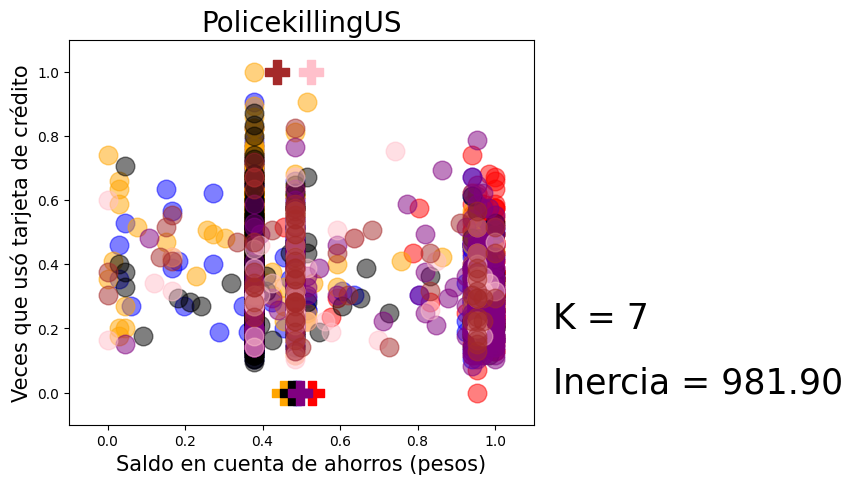

In [11]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(policias_cleaned[policias_cleaned["cluster"] == cluster]["armed"],
                policias_cleaned[policias_cleaned["cluster"] == cluster]["age"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("PolicekillingUS", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()